copied from ripser cocyles documentation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams
import tadasets

In [8]:
def drawLineColored(X, C):
    for i in range(X.shape[0]-1):
        plt.plot(X[i:i+2, 0], X[i:i+2, 1], c=C[i, :], linewidth = 3)

def plotCocycle2D(D, X, cocycle, thresh):
    """
    Given a 2D point cloud X, display a cocycle projected
    onto edges under a given threshold "thresh"
    """
    #Plot all edges under the threshold
    N = X.shape[0]
    t = np.linspace(0, 1, 10)
    c = plt.get_cmap('Greys')
    C = c(np.array(np.round(np.linspace(0, 255, len(t))), dtype=np.int32))
    C = C[:, 0:3]

    for i in range(N):
        for j in range(N):
            if D[i, j] <= thresh:
                Y = np.zeros((len(t), 2))
                Y[:, 0] = X[i, 0] + t*(X[j, 0] - X[i, 0])
                Y[:, 1] = X[i, 1] + t*(X[j, 1] - X[i, 1])
                drawLineColored(Y, C)
    #Plot cocycle projected to edges under the chosen threshold
    for k in range(cocycle.shape[0]):
        [i, j, val] = cocycle[k, :]
        if D[i, j] <= thresh:
            [i, j] = [min(i, j), max(i, j)]
            a = 0.5*(X[i, :] + X[j, :])
            plt.text(a[0], a[1], '%g'%val, color='b')
    #Plot vertex labels
    for i in range(N):
        plt.text(X[i, 0], X[i, 1], '%i'%i, color='r')
    plt.axis('equal')

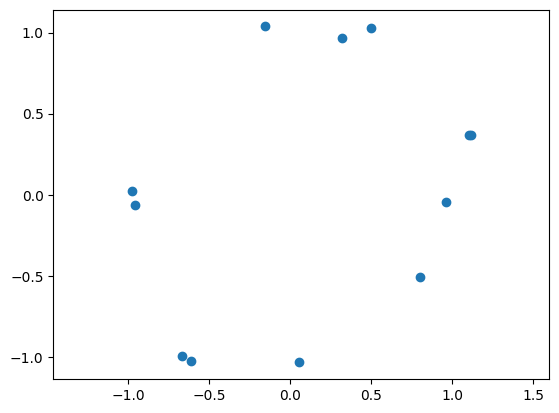

In [4]:
np.random.seed(9)
x = tadasets.dsphere(n=12, d=1, noise=0.1)

plt.scatter(x[:, 0], x[:, 1])
plt.axis('equal')
plt.show()

In [5]:
result = ripser(x, coeff=17, do_cocycles=True)
diagrams = result['dgms']
cocycles = result['cocycles']
D = result['dperm2all']

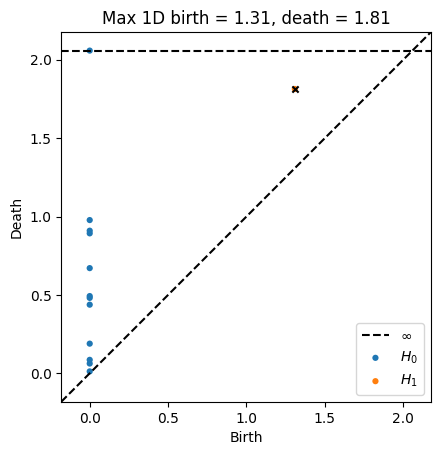

In [6]:
dgm1 = diagrams[1]
idx = np.argmax(dgm1[:, 1] - dgm1[:, 0])
plot_diagrams(diagrams, show = False)
plt.scatter(dgm1[idx, 0], dgm1[idx, 1], 20, 'k', 'x')
plt.title("Max 1D birth = %.3g, death = %.3g"%(dgm1[idx, 0], dgm1[idx, 1]))
plt.show()

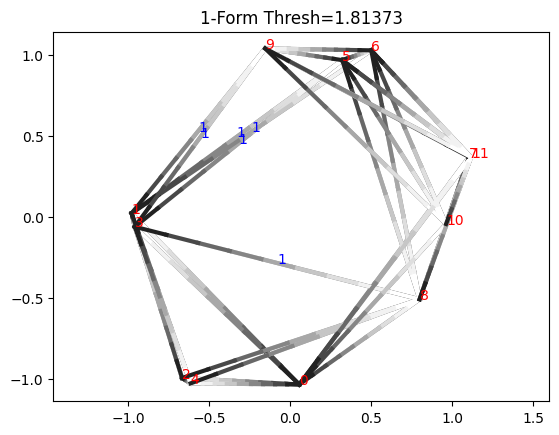

In [9]:
cocycle = cocycles[1][idx]
thresh = dgm1[idx, 1] #Project cocycle onto edges less than or equal to death time
plotCocycle2D(D, x, cocycle, thresh)
plt.title("1-Form Thresh=%g"%thresh)
plt.show()

[[0.         1.47888226 0.72455965 1.40632759 0.67091531 2.01916892
  2.10927997 1.75242481 0.90973388 2.08428275 1.34223545 1.75872492]
 [1.47888226 0.         1.06306945 0.08579416 1.11122862 1.60675082
  1.7880717  2.11144387 1.85467237 1.30874942 1.94148982 2.12305978]
 [0.72455965 1.06306945 0.         0.97750064 0.06233169 2.19641645
  2.33468977 2.23591707 1.54419019 2.09702974 1.88611324 2.24473522]
 [1.40632759 0.08579416 0.97750064 0.         1.02595539 1.64215672
  1.82081514 2.10786213 1.81373186 1.36318771 1.92108682 2.11934513]
 [0.67091531 1.11122862 0.06233169 1.02595539 0.         2.20356053
  2.33824837 2.21549484 1.50560594 2.11749354 1.8584207  2.22409481]
 [2.01916892 1.60675082 2.19641645 1.64215672 2.20356053 0.
  0.18911607 0.98484696 1.55130916 0.48098935 1.19715634 0.9950427 ]
 [2.10927997 1.7880717  2.33468977 1.82081514 2.33824837 0.18911607
  0.         0.89270334 1.56493922 0.65494506 1.16665127 0.90163802]
 [1.75242481 2.11144387 2.23591707 2.10786213 2.2

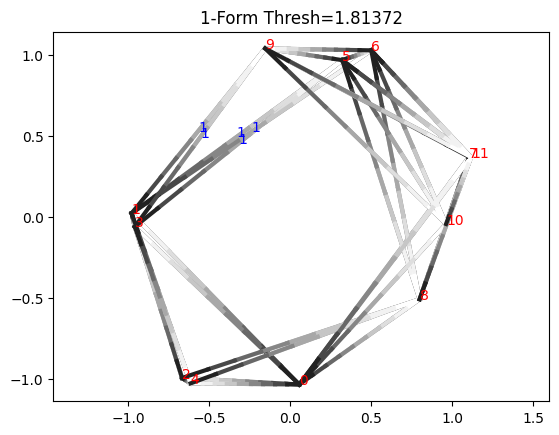

In [12]:
thresh = dgm1[idx, 1]-0.00001 #Project cocycle onto edges less slightly less than the death time
plotCocycle2D(D, x, cocycle, thresh)
print(D)
plt.title("1-Form Thresh=%g"%thresh)
plt.show()

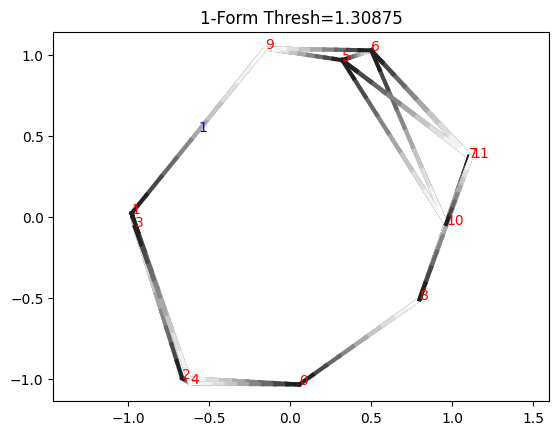

In [11]:
thresh = dgm1[idx, 0] #Project cocycle onto edges that have lengths less than or equal to the birth time
plotCocycle2D(D, x, cocycle, thresh)
plt.title("1-Form Thresh=%g"%thresh)
plt.show()